In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, TargetEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sns.set_style("whitegrid")

In [18]:
df = pd.read_csv("./data/bank.csv", sep=';')
df.columns = ["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [19]:
# details about the dataset
print(df.shape)
print(df.info())

(4521, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [21]:
# checking if there is any missing value
df.notnull().sum()

age          4521
job          4521
marital      4521
education    4521
default      4521
balance      4521
housing      4521
loan         4521
contact      4521
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
previous     4521
poutcome     4521
y            4521
dtype: int64

In [22]:
# checking if there is any duplicate value
df.duplicated().sum()
# lets remove day, duration column as it is not useful for our analysis
df_copy = df.drop(columns=['day', 'duration'])

Text(0.5, 1.0, 'Boxplot of Balance')

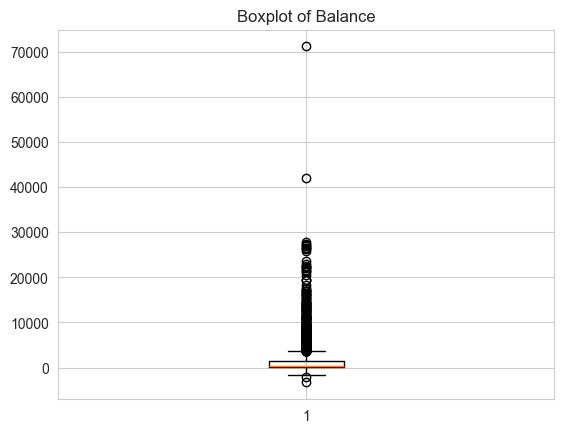

In [23]:
# checking if there is any outlier in the numerical columns ( balance column may have outliers)
plt.boxplot(df_copy['balance']) # box plot helps to identify outliers. 
plt.title("Boxplot of Balance")

Text(0.5, 1.0, 'Boxplot of Balance after removing outliers')

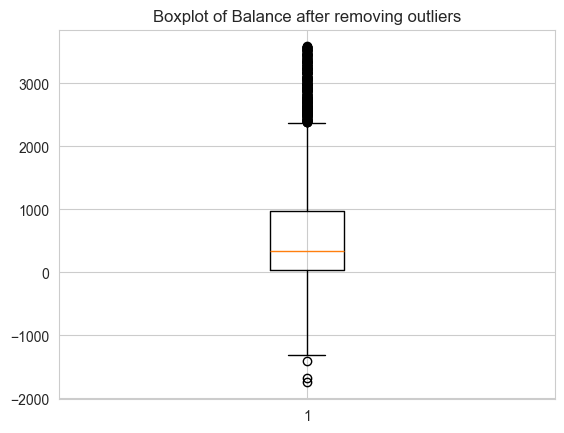

In [24]:
# removing outliers using IQR method
Q1 = df_copy['balance'].quantile(0.25)
Q3 = df_copy['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copy = df_copy[(df_copy['balance'] >= lower_bound) & (df_copy['balance'] <= upper_bound)]
# graph after removing outliers
plt.boxplot(df_copy['balance'])
plt.title("Boxplot of Balance after removing outliers")


In [25]:
# first lets encode the categorical variables
# categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
print(df_copy[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]].head(10))
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

              job  marital  education default housing loan   contact month  \
0      unemployed  married    primary      no      no   no  cellular   oct   
2      management   single   tertiary      no     yes   no  cellular   apr   
3      management  married   tertiary      no     yes  yes   unknown   jun   
4     blue-collar  married  secondary      no     yes   no   unknown   may   
5      management   single   tertiary      no      no   no  cellular   feb   
6   self-employed  married   tertiary      no     yes   no  cellular   may   
7      technician  married  secondary      no     yes   no  cellular   may   
8    entrepreneur  married   tertiary      no     yes   no   unknown   may   
9        services  married    primary      no     yes  yes  cellular   apr   
11         admin.  married  secondary      no     yes   no  cellular   apr   

   poutcome   y  
0   unknown  no  
2   failure  no  
3   unknown  no  
4   unknown  no  
5   failure  no  
6     other  no  
7   unknown  no

In [26]:
for col in categorical_columns:
    print(f"Unique values in {col}: {df_copy[col].unique()}")

Unique values in job: ['unemployed' 'management' 'blue-collar' 'self-employed' 'technician'
 'entrepreneur' 'services' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
Unique values in marital: ['married' 'single' 'divorced']
Unique values in education: ['primary' 'tertiary' 'secondary' 'unknown']
Unique values in default: ['no' 'yes']
Unique values in housing: ['no' 'yes']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['cellular' 'unknown' 'telephone']
Unique values in month: ['oct' 'apr' 'jun' 'may' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
Unique values in poutcome: ['unknown' 'failure' 'other' 'success']
Unique values in y: ['no' 'yes']


In [27]:
# lets use label encoding for default, housing, loan
# lets use one hot encoding for contact, marital, month, poutcome as no value is bigger than others
# lets use ordinal encoding for job, education

label_encoder = LabelEncoder()
for col in ["default", "housing", "loan"]:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

# onehot_encoder = OneHotEncoder(sparse_output=False, drop='first') # sparse_output=False to get dense array, drop='first' to avoid dummy variable trap
# onehot_encoded = onehot_encoder.fit_transform(df_copy[["contact", "marital", "month", "poutcome"]])

# df_encoded = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(["contact", "marital", "month", "poutcome"]))
# print(df_encoded.head(10))
# df_copy = pd.concat([df_copy.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

#one hot encoding using pandas get_dummies
df_copy = pd.get_dummies(df_copy, columns=["contact", "marital", "month", "poutcome"], drop_first=True, dtype=int)

#label encoding for target variable y
df_copy["y"] = label_encoder.fit_transform(df_copy["y"])

ordinal_encoder = OrdinalEncoder()
job_order = ["admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown"]
education_order = ["primary", "secondary", "tertiary", "unknown"]
df_copy[["job", "education"]] = ordinal_encoder.fit_transform(df_copy[["job", "education"]], [job_order, education_order])

In [28]:
# dataframe after encoding
print(df_copy.head())

   age   job  education  default  balance  housing  loan  campaign  pdays  \
0   30  10.0        0.0        0     1787        0     0         1     -1   
2   35   4.0        2.0        0     1350        1     0         1    330   
3   30   4.0        2.0        0     1476        1     1         4     -1   
4   59   1.0        1.0        0        0        1     0         1     -1   
5   35   4.0        2.0        0      747        0     0         2    176   

   previous  ...  month_jul  month_jun  month_mar  month_may  month_nov  \
0         0  ...          0          0          0          0          0   
2         1  ...          0          0          0          0          0   
3         0  ...          0          1          0          0          0   
4         0  ...          0          0          0          1          0   
5         3  ...          0          0          0          0          0   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0       

In [29]:
# feature scaling
scaler = StandardScaler()
numerical_columns = ["age", "balance", "campaign", "pdays", "previous"]
df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])
print(df_copy.head())

        age   job  education  default   balance  housing  loan  campaign  \
0 -1.049327  10.0        0.0        0  1.312269        0     0 -0.571849   
2 -0.567924   4.0        2.0        0  0.809790        1     0 -0.571849   
3 -1.049327   4.0        2.0        0  0.954670        1     1  0.387338   
4  1.742811   1.0        1.0        0 -0.742489        1     0 -0.571849   
5 -0.567924   4.0        2.0        0  0.116439        0     0 -0.252120   

      pdays  previous  ...  month_jul  month_jun  month_mar  month_may  \
0 -0.403092 -0.312837  ...          0          0          0          0   
2  2.883745  0.286705  ...          0          0          0          0   
3 -0.403092 -0.312837  ...          0          1          0          0   
4 -0.403092 -0.312837  ...          0          0          0          1   
5  1.354522  1.485788  ...          0          0          0          0   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          1   

In [30]:
# splitting the data into features and target variable
X = df_copy.drop(columns=['y'])
y = df_copy['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [31]:
# training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# predicting the values
y_pred = model.predict(X_test)
# evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8941469489414695
Precision: 0.6666666666666666
Recall: 0.1111111111111111
F1 Score: 0.19047619047619047


In [32]:
import pickle
with open("./models/bank_marketing_model.pkl", "wb") as f:
    pickle.dump(model, f)   
    

# Build and Save a Preprocessing Pipeline
This section rebuilds the logistic regression using a full sklearn Pipeline (encoders + scaler + model) and saves it to `./models/bank_marketing_model.pkl`. Run this and then use the Streamlit app with raw inputs.

In [33]:
# Create and save a preprocessing + model Pipeline for deployment
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Use the original raw dataframe `df` loaded earlier
# Drop columns not used during training
X_raw = df.drop(columns=["day", "duration", "y"]).copy()
y_raw = df["y"].copy()

# Target to binary 0/1 to match earlier label encoding
# ('no' -> 0, 'yes' -> 1)
y_raw = (y_raw == "yes").astype(int)

# Define columns by type
numeric_cols = ["age", "balance", "campaign", "pdays", "previous"]
binary_cols = ["default", "housing", "loan"]
ortho_cols = ["contact", "marital", "month", "poutcome"]
ordinal_cols = ["job", "education"]

# Explicit category orders to ensure stable encoding
job_order = [
    "admin.", "blue-collar", "entrepreneur", "housemaid", "management",
    "retired", "self-employed", "services", "student", "technician",
    "unemployed", "unknown"
]
education_order = ["primary", "secondary", "tertiary", "unknown"]

# Known categories for one-hot/binary
contact_cats = ["cellular", "telephone", "unknown"]
marital_cats = ["divorced", "married", "single"]
month_cats = ["apr", "aug", "dec", "feb", "jan", "jul", "jun", "mar", "may", "nov", "oct", "sep"]
poutcome_cats = ["failure", "other", "success", "unknown"]

# ColumnTransformer with scaling + encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("bin", OrdinalEncoder(categories=[["no", "yes"], ["no", "yes"], ["no", "yes"]]), binary_cols),
        ("ord", OrdinalEncoder(categories=[job_order, education_order]), ordinal_cols),
        ("onehot", OneHotEncoder(categories=[contact_cats, marital_cats, month_cats, poutcome_cats], drop="first", handle_unknown="ignore"), ortho_cols),
    ],
    remainder="drop",
)

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

pipe.fit(X_train_raw, y_train_raw)

# Quick evaluation
y_pred_raw = pipe.predict(X_test_raw)
acc = accuracy_score(y_test_raw, y_pred_raw)
prec = precision_score(y_test_raw, y_pred_raw)
rec = recall_score(y_test_raw, y_pred_raw)
f1 = f1_score(y_test_raw, y_pred_raw)
print(f"Pipeline Accuracy: {acc:.4f}")
print(f"Pipeline Precision: {prec:.4f}")
print(f"Pipeline Recall: {rec:.4f}")
print(f"Pipeline F1: {f1:.4f}")

# Save the full pipeline (preprocessing + model)
with open("./models/bank_marketing_model.pkl", "wb") as f:
    pickle.dump(pipe, f)


Pipeline Accuracy: 0.8917
Pipeline Precision: 0.6154
Pipeline Recall: 0.1538
Pipeline F1: 0.2462
